# Разведывательный анализ данных (EDA) 
## Описание задачи
Вас пригласили поучаствовать в одном из проектов UNICEF — международного подразделения ООН, чья миссия состоит в повышении уровня благополучия детей по всему миру.

Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

И сделать это можно с помощью модели, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы. Чтобы определиться с параметрами будущей модели, необходимо провести разведывательный анализ данных и составить отчёт по его результатам.

### Описание датасета по условиям задачи

Переменные, которые содержит датасет:

1. school — аббревиатура школы, в которой учится ученик

2. sex — пол ученика ('F' - женский, 'M' - мужской)

3. age — возраст ученика (от 15 до 22)

4. address — тип адреса ученика ('U' - городской, 'R' - за городом)

5. famsize — размер семьи('LE3' <= 3, 'GT3' >3)

6. Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7. Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8. Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9. Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10. Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11. reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12. guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13. traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14. studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15. failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

16. schoolsup — дополнительная образовательная поддержка (yes или no)

17. famsup — семейная образовательная поддержка (yes или no)

18. paid — дополнительные платные занятия по математике (yes или no)

19. activities — дополнительные внеучебные занятия (yes или no)

20. nursery — посещал детский сад (yes или no)

21. higher — хочет получить высшее образование (yes или no)

22. internet — наличие интернета дома (yes или no)

23. romantic — в романтических отношениях (yes или no)

24. famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25. freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26. goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27. health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28. absences — количество пропущенных занятий

29. score — баллы по госэкзамену по математике

## Первичный осмотр данных и загрузка необходимых бибилиотек

In [868]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

students = pd.read_csv('stud_math.csv')

In [869]:
# Посмотрим на содержание датасета и типы данных
students.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [870]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [871]:
# Посмотрим, сколько значений NaN по каждому столбцу:
students.isnull().sum(axis = 0)

school                  0
sex                     0
age                     0
address                17
famsize                27
Pstatus                45
Medu                    3
Fedu                   24
Mjob                   19
Fjob                   36
reason                 17
guardian               31
traveltime             28
studytime               7
failures               22
schoolsup               9
famsup                 39
paid                   40
activities             14
nursery                16
studytime, granular     7
higher                 20
internet               34
romantic               31
famrel                 27
freetime               11
goout                   8
health                 15
absences               12
score                   6
dtype: int64

На данном этапе мы видим, что датасет состоит из 395 строк, 30 колонок. Типы переменных: числовые (13) и номинативные (17). Только три столбца не имеют пропусков. Можно заметить, что в описании задачи указано 29 столбцов, а в датасете их 30. Неупомянутный столбец - 'studytime, granular', поэтому нужно более внимательно посмотреть на эту колонку, понять, что она из себя представляет и решить, что с ней делать в дальнейшем - удалить или оставить.

## Предобработка (Функции)

In [872]:
# Заменим пропущенные значения на None:
def change_none(column):
    students[column] = students[column].apply(lambda x: None if pd.isna(x) == True else x)
    return (column)

for col in students.columns:
    change_none(col)

In [873]:
# Функция, заменяющая значения None для количественных переменных на значения моды
def change_mode(column):
    return students[column].fillna((int(students[column].mode())), inplace=True)

# Функция, заменяющая значения None для номинативных переменных на самое часто встречающееся значение
def change_max(column):
    return students[column].fillna((students[column].value_counts().idxmax()), inplace=True)

In [874]:
# Функция просмотра распределения значений:
def val_cnts(column):
    return students[column].value_counts()

# Функция просмотра общего числа и уникальных значений:
def descrb(column):
    return students[column].describe()

# Функция просмотра количества нулевых значений
def count_null(column):
    return print('Количество нулевых значений = {}'.format(students[column].isnull().sum()))

In [875]:
# Функция просмотра общей информации о переменных
def general_info(col):
    print('\t', col, '\n')
    print(val_cnts(col), '\n') 
    print(descrb(col), '\n')
    print(count_null(col), '\n')

In [876]:
# Добавим функцию для вызова графика boxplot со score:
def get_boxplot(column):
    '''Данная функция строит график boxplot, где в качестве
    y - значение оценки ученика, а в качестве x необходимая колонка
    для анализа.'''
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=students.loc[students.loc[:, column].isin(
                    students.loc[:, column].value_counts().index[:10])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

# Первичный анализ данных

In [877]:
# Рассмотрим отмеченный вышестолбец 'studytime, granular', который подозрительно похож на 'studytime'. Сравним их:
students[['studytime, granular', 'studytime']]

,"studytime, granular",studytime
0,-6.0,2.0
1,-6.0,2.0
2,-6.0,2.0
3,-9.0,3.0
4,-6.0,2.0
...,...,...
390,-6.0,2.0
391,-3.0,1.0
392,-3.0,1.0
393,-3.0,1.0


In [878]:
# Видно, что 'studytime, granular' - это те же значения studytime, умноженные на -3. 
# Проверим, насколько сильно они коррелируют между собой.
students.studytime.corr(students['studytime, granular'])

-0.9999999999999991

In [879]:
# Заметна сильная отрицательная корреляция, поэтому столбец 'studytime, granular' можно спокойно удалить.
students.drop(['studytime, granular'], inplace=True, axis=1)

## Первичный анализ данных в столбцах
### school, sex

In [880]:
for col in ['school', 'sex']:
    general_info(col)

	 school 

GP    349
MS     46
Name: school, dtype: int64 

count     395
unique      2
top        GP
freq      349
Name: school, dtype: object 

Количество нулевых значений = 0
None 

	 sex 

F    208
M    187
Name: sex, dtype: int64 

count     395
unique      2
top         F
freq      208
Name: sex, dtype: object 

Количество нулевых значений = 0
None 



Как мы видим, пропусков в этих колонках действительно нет, уникальные значения также соотвествуют действительности.

### age

	 age 

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64 

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64 

Количество нулевых значений = 0
None 



None

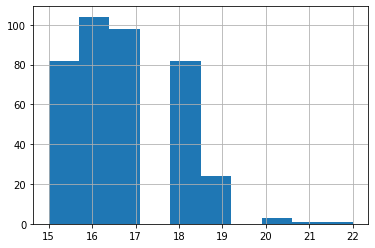

In [881]:
display(general_info('age'),
    students.age.hist())

Пропусков нет. Наш возрастной диапазон 15-22. Давайте посмотрим, имеются ли выбросы.

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


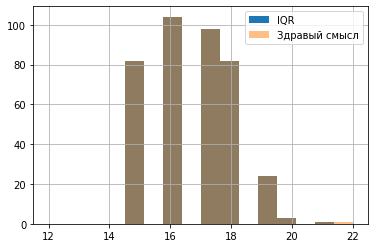

In [882]:
IQR_age = students.age.quantile(0.75) - students.age.quantile(0.25)
perc25_age = students.age.quantile(0.25)
perc75_age = students.age.quantile(0.75)

print(
    '25-й перцентиль: {},'.format(perc25_age),
    '75-й перцентиль: {},'.format(perc75_age),
    "IQR: {}, ".format(IQR_age),
    "Границы выбросов: [{f}, {l}].".format(f=perc25_age - 1.5*IQR_age, l=perc75_age + 1.5*IQR_age))

students.age.loc[students.age.between(perc25_age - 1.5*IQR_age, perc75_age + 1.5*IQR_age)
           ].hist(bins=16, range=(12, 22), label='IQR')
students.age.loc[students.age <= 100].hist(
    alpha=0.5, bins=16, range=(12, 22), label='Здравый смысл')
plt.legend()

In [883]:
# Удалим выброс
students = students.loc[students.age <= 21]
students.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      394 non-null    object 
 1   sex         394 non-null    object 
 2   age         394 non-null    int64  
 3   address     377 non-null    object 
 4   famsize     367 non-null    object 
 5   Pstatus     349 non-null    object 
 6   Medu        391 non-null    float64
 7   Fedu        370 non-null    float64
 8   Mjob        375 non-null    object 
 9   Fjob        358 non-null    object 
 10  reason      377 non-null    object 
 11  guardian    363 non-null    object 
 12  traveltime  366 non-null    float64
 13  studytime   387 non-null    float64
 14  failures    372 non-null    float64
 15  schoolsup   385 non-null    object 
 16  famsup      355 non-null    object 
 17  paid        354 non-null    object 
 18  activities  380 non-null    object 
 19  nursery     378 non-null    o

### address

	 age 

16    104
17     98
18     82
15     82
19     24
20      3
21      1
Name: age, dtype: int64 

count    394.000000
mean      16.682741
std        1.249267
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       21.000000
Name: age, dtype: float64 

Количество нулевых значений = 0
None 



None

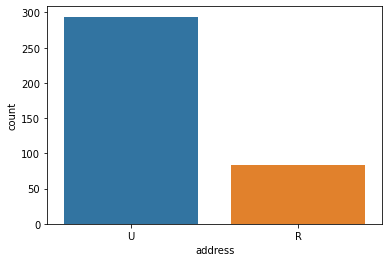

In [884]:
display(general_info('age'),
    sns.countplot(x='address', data=students))

В колонке адреса у нас есть два уникальных значения (U - urban, R - rural). А также 17 пропущенных значений.
Можно предположить, что место жительства ученика связано со школой. Давайте посмотрим на распределение учеников по графе адреса и по графе школы.

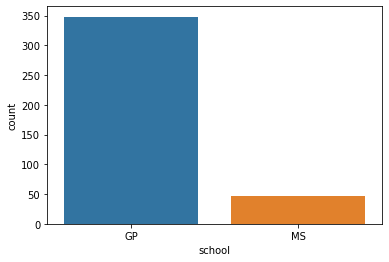

In [885]:
sns.countplot(x='school', data=students)

Несмотря на то, что разница в распределении между школами больше, чем между местом проживания, определённая зависимости всё-таки прослеживается: городские школьники чаще посещают школу GP, а сельские - MS. В связи с этим, чтобы избежать удаления 17 пустых значений (так как в них далее может быть полезная информация), предлагаю распределить пустые значения на urban и rural в зависимости от школы, которую посещает ученик, что поможет избежать сильного искажения соотношения.

Количество нулевых значений = 0


U    306
R     88
Name: address, dtype: int64

None

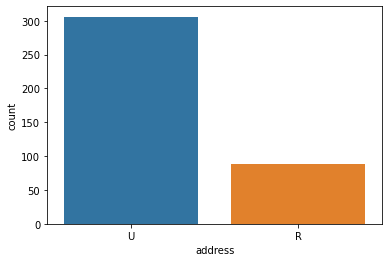

In [886]:
# присвоим значение U учащимся из школы GP, если значение адреса пропущено.
students.loc[(students['school'] == 'GP') & (students.address.isnull()), 'address'] = 'U'

# присвоим значение R остальным учащимся с пропущенным адресом:
students.loc[(students.address.isnull()), 'address'] = 'R'

# проверим, что у нас получилось:
display(val_cnts('address'),
        count_null('address'),        
        sns.countplot(x='address', data=students))

### famsize

	 famsize 

GT3    260
LE3    107
Name: famsize, dtype: int64 

count     367
unique      2
top       GT3
freq      260
Name: famsize, dtype: object 

Количество нулевых значений = 27
None 

None


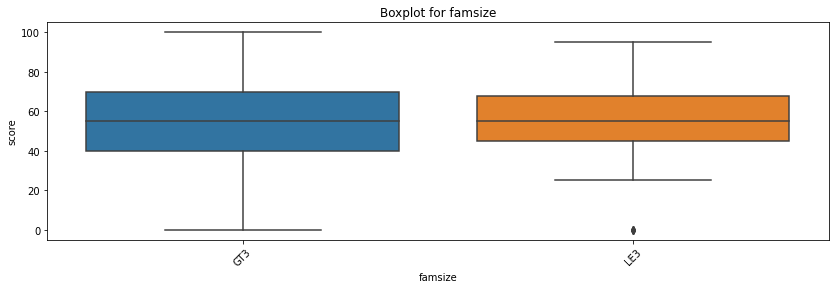

None


In [887]:
print(general_info('famsize'))
print(get_boxplot('famsize'))

Визуально боксплот не показывает сильную зависимость между успеваемостью ученика и размером семьи, поэтому пока я считаю возможным оставить пустые значения без изменений и вернуться к этой колонке для возможного заполнения после формирования модели при необходимости.

### Pstatus

	 Pstatus 

T    313
A     36
Name: Pstatus, dtype: int64 

count     349
unique      2
top         T
freq      313
Name: Pstatus, dtype: object 

Количество нулевых значений = 45
None 

None


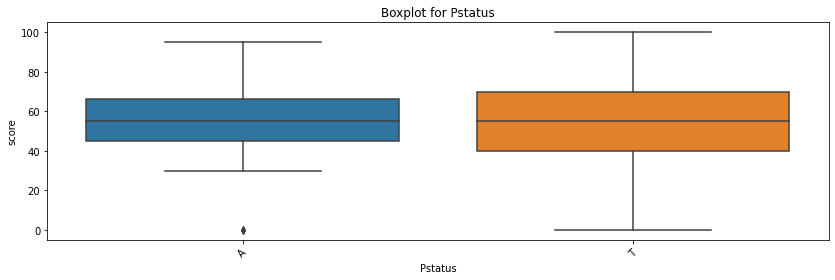

In [888]:
print(general_info('Pstatus'))
get_boxplot('Pstatus')

В данной колонке мы имеем два уникальных значения (T - вместе, together и А - раздельно, apart) и 45 пропущенных значений, что довольно много.
Визуально боксплот не показывает сильную зависимость между успеваемостью ученика и совместного проживания родителей, поэтому пока я считаю возможным оставить пустые значения без изменений и вернуться к этой колонке для возможного заполнения после формирования модели при необходимости.

### Medu

	 Medu 

4.0    131
2.0    102
3.0     96
1.0     59
0.0      3
Name: Medu, dtype: int64 

count    391.000000
mean       2.749361
std        1.099461
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64 

Количество нулевых значений = 3
None 

None


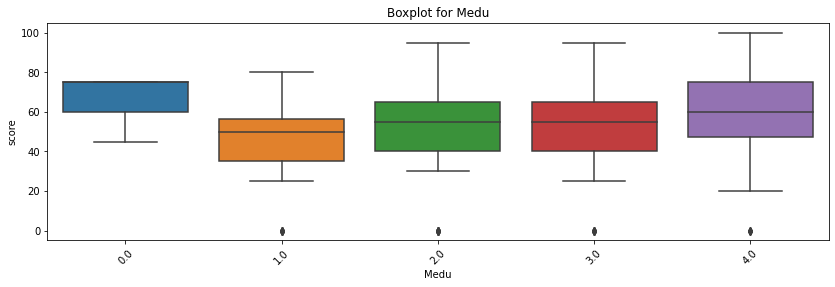

In [889]:
print(general_info('Medu'))
get_boxplot('Medu')

In [890]:
# Так как заметна определённая взаимосвязь, сразу заполним пустые значения самым часто встречающимся значением
change_max('Medu')

### Fedu

	 Fedu 

2.0     106
3.0      96
4.0      88
1.0      77
0.0       2
40.0      1
Name: Fedu, dtype: int64 

count    370.000000
mean       2.618919
std        2.230163
min        0.000000
25%        2.000000
50%        2.500000
75%        3.000000
max       40.000000
Name: Fedu, dtype: float64 

Количество нулевых значений = 24
None 

None


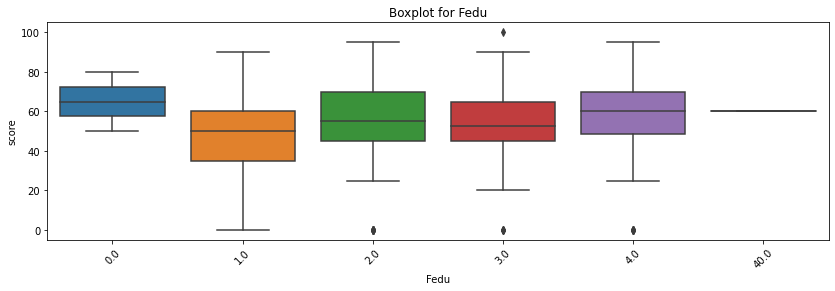

In [891]:
print(general_info('Fedu'))
get_boxplot('Fedu')

In [892]:
# Заменим очевидно ошибочное значение 40 на 4
students.Fedu = students.Fedu.replace(to_replace=40.0, value=4.0)
# Так как заметна определённая взаимосвязь, сразу заполним пустые значения самым часто встречающимся значением
change_max('Fedu')

### Mjob

	 Mjob 

other       133
services     97
at_home      58
teacher      55
health       32
Name: Mjob, dtype: int64 

count       375
unique        5
top       other
freq        133
Name: Mjob, dtype: object 

Количество нулевых значений = 19
None 

None


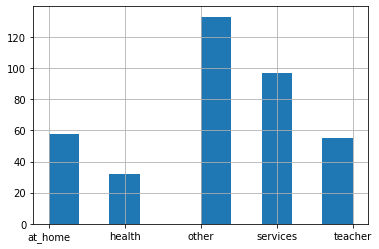

In [893]:
print(general_info('Mjob'))
students.Mjob.hist()

Глядя на гистаграмму, сложно найти явно превалирующий признак, поэтому на данном этапе целесообразно оставить пустые значения без изменения и вернуться к этой колонке после построения модели, если это будет необходимо.

### Fjob

	 Fjob 

other       197
services    101
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64 

count       358
unique        5
top       other
freq        197
Name: Fjob, dtype: object 

Количество нулевых значений = 36
None 

None


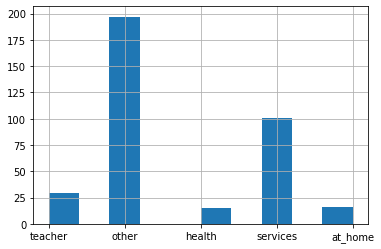

In [894]:
print(general_info('Fjob'))
students.Fjob.hist()

In [895]:
# Так как заметен доминирующий признак, предлагаю заполнить пустые значения самым часто встречающимся значением
change_max('Fjob')

### reason

	 reason 

course        137
home          104
reputation    103
other          33
Name: reason, dtype: int64 

count        377
unique         4
top       course
freq         137
Name: reason, dtype: object 

Количество нулевых значений = 17
None 

None


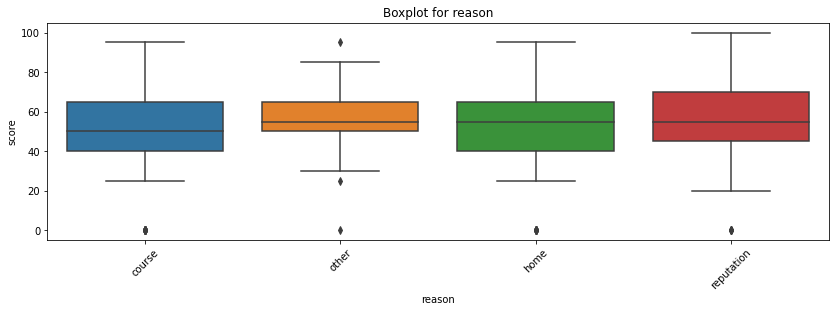

None


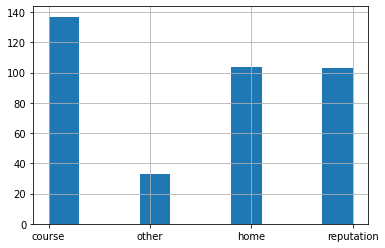

In [896]:
print(general_info('reason'))
print(get_boxplot('reason'))
students.reason.hist()

Глядя на гистаграмму и боксплот, сложно найти явно превалирующий признак и определённую взаимосвязь, поэтому на данном этапе целесообразно оставить пустые значения без изменения и вернуться к этой колонке после построения модели, если это будет необходимо.

### guardian

	 guardian 

mother    249
father     86
other      28
Name: guardian, dtype: int64 

count        363
unique         3
top       mother
freq         249
Name: guardian, dtype: object 

Количество нулевых значений = 31
None 

None


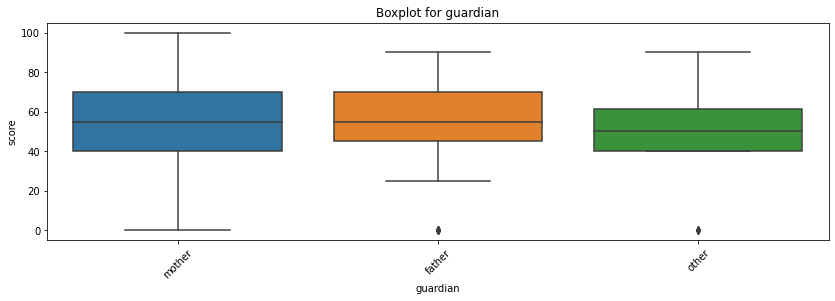

In [897]:
print(general_info('guardian'))
get_boxplot('guardian')

Визуально боксплот не показывает сильную зависимость между успеваемостью ученика и совместного проживания родителей, поэтому пока я считаю возможным оставить пустые значения без изменений и вернуться к этой колонке для возможного заполнения после формирования модели при необходимости.

### traveltime

	 traveltime 

1.0    241
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64 

count    366.000000
mean       1.439891
std        0.694751
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64 

Количество нулевых значений = 28
None 

None


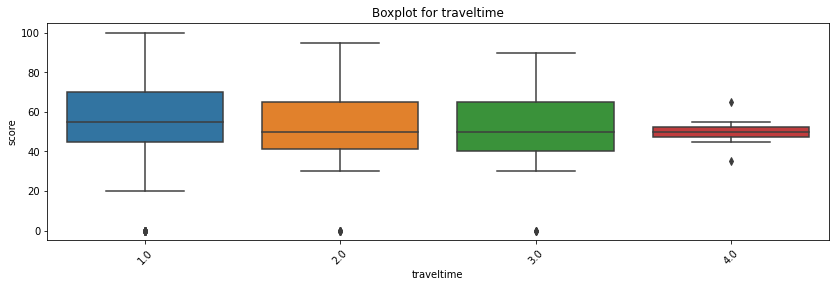

In [898]:
print(general_info('traveltime'))
get_boxplot('traveltime')

In [899]:
# Так как заметен доминирующий признак, предлагаю заполнить пустые значения самым часто встречающимся значением
change_max('traveltime')
count_null('traveltime')

Количество нулевых значений = 0


### studytime

	 studytime 

2.0    194
1.0    102
3.0     64
4.0     27
Name: studytime, dtype: int64 

count    387.000000
mean       2.041344
std        0.841505
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64 

Количество нулевых значений = 7
None 

None


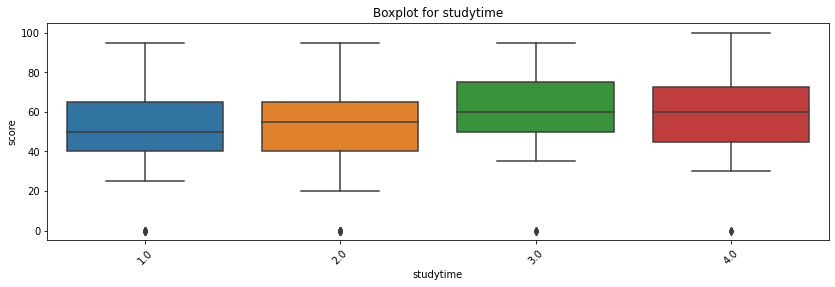

In [900]:
print(general_info('studytime'))
get_boxplot('studytime')

In [901]:
# Так как заметна определённая взаимосвязь, сразу заполним пустые значения самым часто встречающимся значением
change_max('studytime')

### failures

	 failures 

0.0    293
1.0     49
2.0     16
3.0     14
Name: failures, dtype: int64 

count    372.000000
mean       0.330645
std        0.731152
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64 

Количество нулевых значений = 22
None 

None


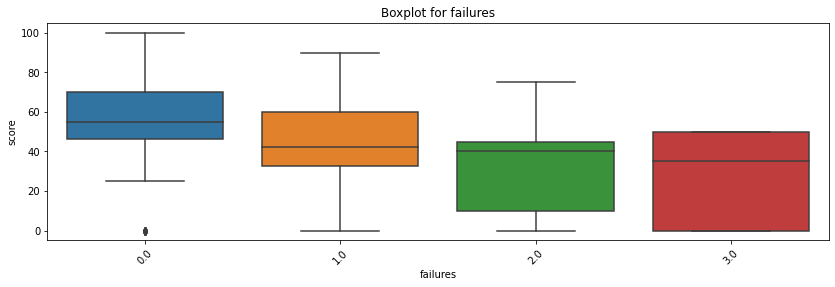

In [902]:
print(general_info('failures'))
get_boxplot('failures')

In [903]:
# Так как заметна определённая взаимосвязь, сразу заполним пустые значения самым часто встречающимся значением
change_max('failures')

### schoolsup

	 schoolsup 

no     334
yes     51
Name: schoolsup, dtype: int64 

count     385
unique      2
top        no
freq      334
Name: schoolsup, dtype: object 

Количество нулевых значений = 9
None 

None


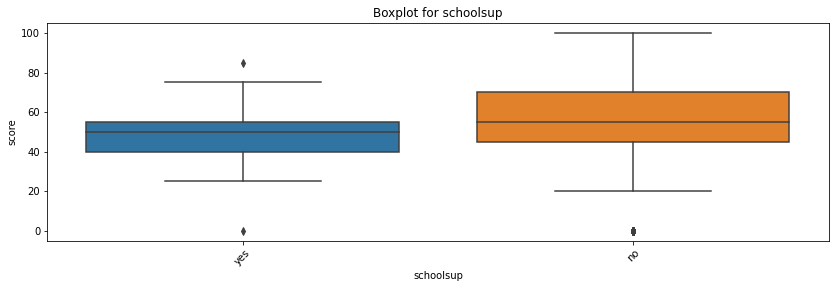

In [904]:
print(general_info('schoolsup'))
get_boxplot('schoolsup')

In [905]:
# Так как заметна определённая взаимосвязь и превалирующий признак, сразу заполним пустые значения самым часто встречающимся значением
change_max('schoolsup')

### famsup

	 famsup 

yes    219
no     136
Name: famsup, dtype: int64 

count     355
unique      2
top       yes
freq      219
Name: famsup, dtype: object 

Количество нулевых значений = 39
None 

None


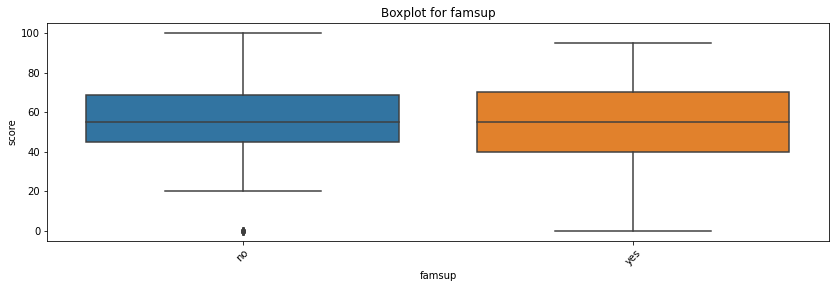

In [906]:
print(general_info('famsup'))
get_boxplot('famsup')

Визуально боксплот не показывает сильную зависимость между успеваемостью ученика и семейной образовательной поддержкой, поэтому пока я считаю возможным оставить пустые значения без изменений и вернуться к этой колонке для возможного заполнения после формирования модели при необходимости.

### paid

	 paid 

no     199
yes    155
Name: paid, dtype: int64 

count     354
unique      2
top        no
freq      199
Name: paid, dtype: object 

Количество нулевых значений = 40
None 

None


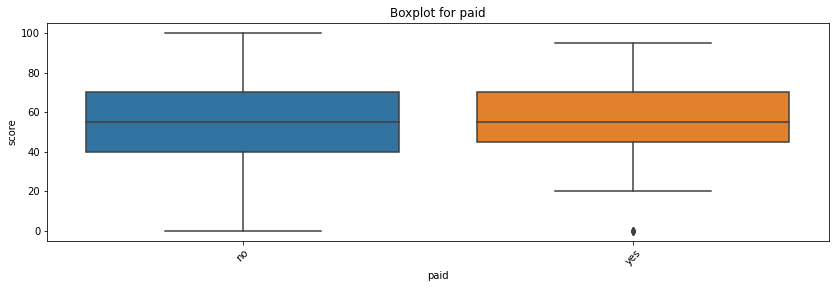

In [907]:
print(general_info('paid'))
get_boxplot('paid')

Визуально боксплот и распределение признака не показывает сильную зависимость между успеваемостью ученика и платной поддержкой, а также доминирования определённого признака, поэтому пока я считаю возможным оставить пустые значения без изменений и вернуться к этой колонке для возможного заполнения после формирования модели при необходимости.

### activities

	 activities 

yes    195
no     185
Name: activities, dtype: int64 

count     380
unique      2
top       yes
freq      195
Name: activities, dtype: object 

Количество нулевых значений = 14
None 

None


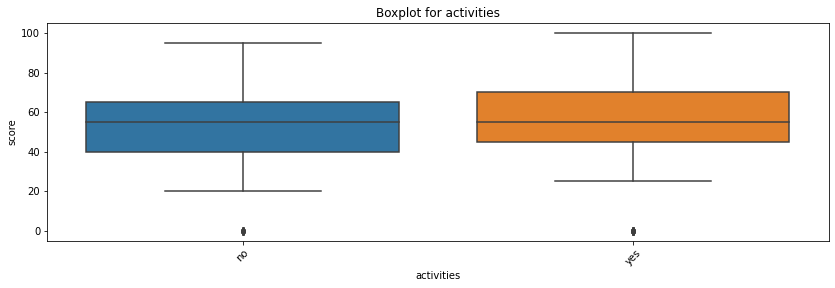

In [908]:
print(general_info('activities'))
get_boxplot('activities')

Визуально боксплот и распределение признака не показывает сильную зависимость между успеваемостью ученика и доп внеучебными занятиями, а также доминирования определённого признака, поэтому пока я считаю возможным оставить пустые значения без изменений и вернуться к этой колонке для возможного заполнения после формирования модели при необходимости.

### nursery

	 nursery 

yes    300
no      78
Name: nursery, dtype: int64 

count     378
unique      2
top       yes
freq      300
Name: nursery, dtype: object 

Количество нулевых значений = 16
None 

None


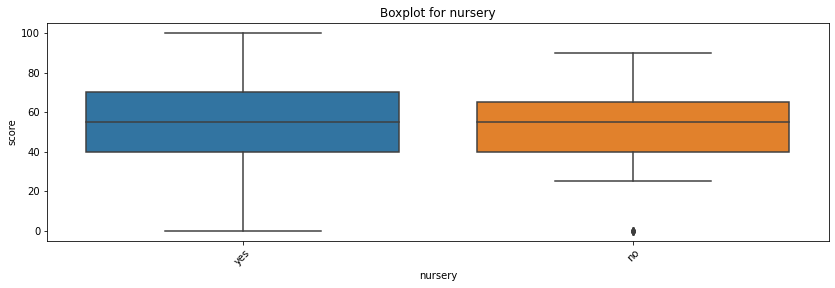

In [909]:
print(general_info('nursery'))
get_boxplot('nursery')

In [910]:
# Так как заметен доминирующий признак, сразу заполним пустые значения самым часто встречающимся значением
change_max('nursery')

### higher

	 higher 

yes    356
no      18
Name: higher, dtype: int64 

count     374
unique      2
top       yes
freq      356
Name: higher, dtype: object 

Количество нулевых значений = 20
None 

None


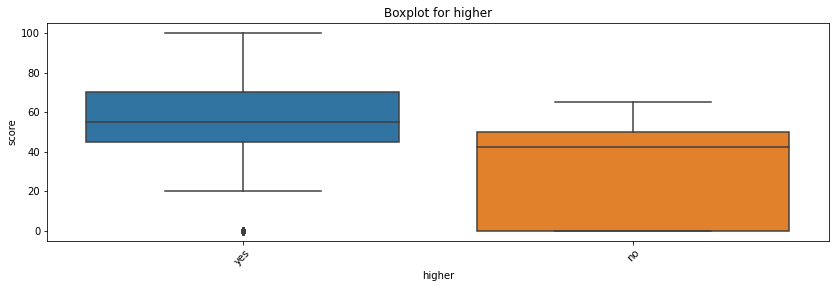

In [911]:
print(general_info('higher'))
get_boxplot('higher')

In [912]:
# Так как заметен доминирующий признак и определённая взаимосвзяь, сразу заполним пустые значения самым часто встречающимся значением
change_max('higher')

### internet

	 internet 

yes    304
no      56
Name: internet, dtype: int64 

count     360
unique      2
top       yes
freq      304
Name: internet, dtype: object 

Количество нулевых значений = 34
None 

None


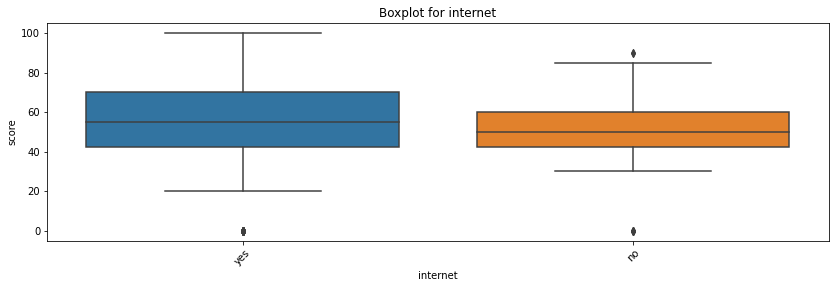

In [913]:
print(general_info('internet'))
get_boxplot('internet')

In [914]:
# Так как заметен доминирующий признак и определённая взаимосвзяь, сразу заполним пустые значения самым часто встречающимся значением
change_max('internet')

### romantic

	 romantic 

no     240
yes    123
Name: romantic, dtype: int64 

count     363
unique      2
top        no
freq      240
Name: romantic, dtype: object 

Количество нулевых значений = 31
None 

None


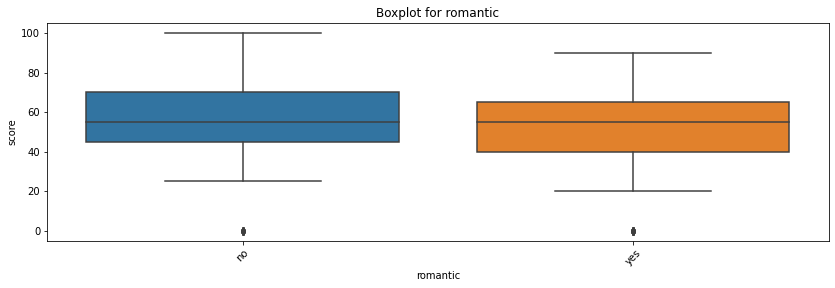

In [915]:
print(general_info('romantic'))
get_boxplot('romantic')

Визуально боксплот и распределение признака не показывает сильную зависимость между успеваемостью ученика и наличием отношений, а также доминирования определённого признака, поэтому пока я считаю возможным оставить пустые значения без изменений и вернуться к этой колонке для возможного заполнения после формирования модели при необходимости.

### famrel

	 famrel 

 4.0    182
 5.0     98
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64 

count    367.000000
mean       3.934605
std        0.926876
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64 

Количество нулевых значений = 27
None 

None


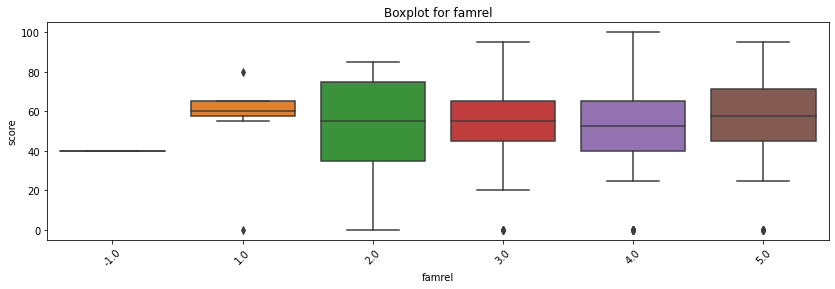

In [916]:
print(general_info('famrel'))
get_boxplot('famrel')

In [917]:
# Так как допустимы значения в интервале от 1 до 5, предполагаем, что допущена ошибка и исправляем её, меян значение -1 на 1:
students.famrel = students.famrel.replace(to_replace=-1.0, value=1.0)

Выбросы исчезли, но явно доминирующий признак не выявлен, поэтому пока я считаю возможным оставить пустые значения без изменений и вернуться к этой колонке для возможного заполнения после формирования модели при необходимости.

### freetime

	 freetime 

3.0    153
4.0    111
2.0     63
5.0     38
1.0     18
Name: freetime, dtype: int64 

count    383.000000
mean       3.229765
std        0.994462
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64 

Количество нулевых значений = 11
None 

None


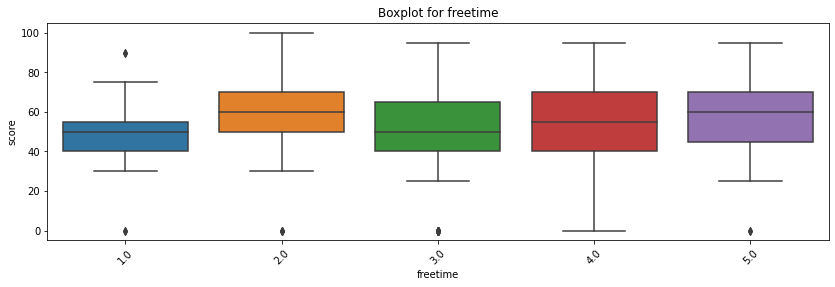

In [918]:
print(general_info('freetime'))
get_boxplot('freetime')

Явно доминирующий признак не выявлен, поэтому пока я считаю возможным оставить пустые значения без изменений и вернуться к этой колонке для возможного заполнения после формирования модели при необходимости.

### goout

	 goout 

3.0    127
2.0    101
4.0     84
5.0     51
1.0     23
Name: goout, dtype: int64 

count    386.000000
mean       3.101036
std        1.113156
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64 

Количество нулевых значений = 8
None 

None


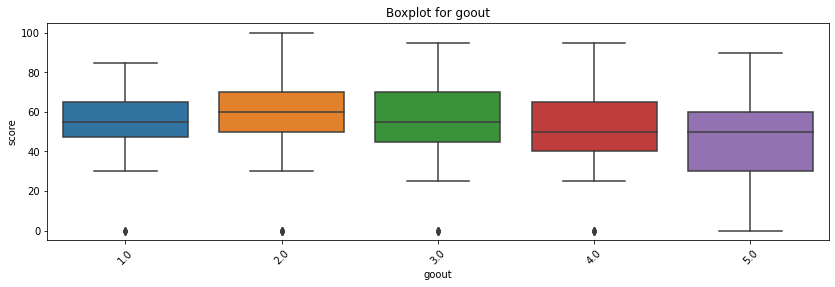

In [919]:
print(general_info('goout'))
get_boxplot('goout')

Явно доминирующий признак не выявлен, поэтому пока я считаю возможным оставить пустые значения без изменений и вернуться к этой колонке для возможного заполнения после формирования модели при необходимости.

### health

	 health 

5.0    138
3.0     89
4.0     63
1.0     46
2.0     43
Name: health, dtype: int64 

count    379.000000
mean       3.538259
std        1.391770
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64 

Количество нулевых значений = 15
None 

None


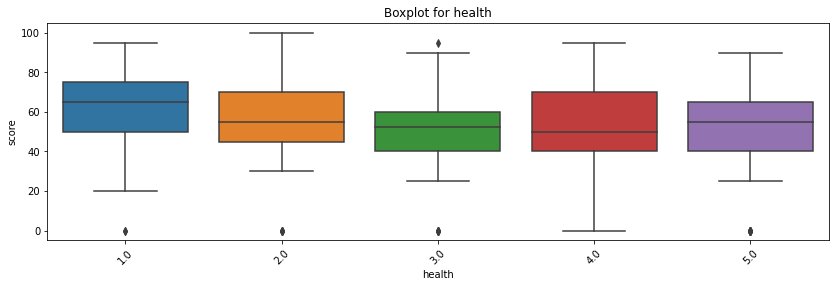

In [920]:
print(general_info('health'))
get_boxplot('health')

Явно доминирующий признак не выявлен, поэтому пока я считаю возможным оставить пустые значения без изменений и вернуться к этой колонке для возможного заполнения после формирования модели при необходимости.

### absences

	 absences 

0.0      111
2.0       60
4.0       53
6.0       31
8.0       21
10.0      17
12.0      12
14.0      12
3.0        8
16.0       6
7.0        6
5.0        5
18.0       5
20.0       4
22.0       3
9.0        3
1.0        3
15.0       2
13.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64 

count    382.000000
mean       7.256545
std       23.491712
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64 

Количество нулевых значений = 12
None 

None


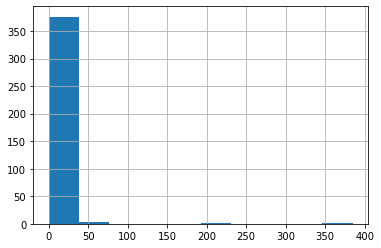

In [921]:
print(general_info('absences'))
students.absences.hist()

Невооружённым взглядом заметны явные выбросы, постром боксплот, чтобы убедиться.

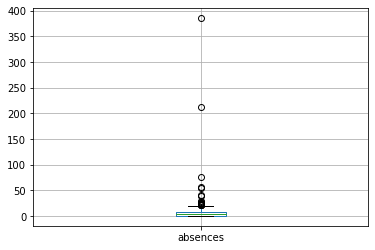

In [922]:
students.boxplot(column='absences')

In [923]:
# 12 пустых значений заменим на медианное значение.
students.absences = students.absences.fillna(students.absences.median())

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


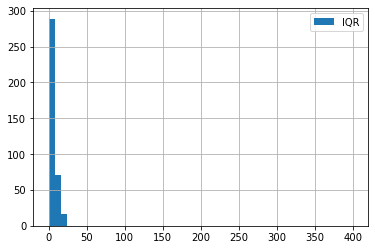

In [924]:
# Рассчитаем точные значения выбросов и составим гистограмму.

IQR_abs = students.absences.quantile(0.75) - students.absences.quantile(0.25)
perc25_abs = students.absences.quantile(0.25)
perc75_abs = students.absences.quantile(0.75)

print(
    '25-й перцентиль: {},'.format(perc25_abs),
    '75-й перцентиль: {},'.format(perc75_abs),
    "IQR: {}, ".format(IQR_abs),
    "Границы выбросов: [{f}, {l}].".format(f=perc25_abs - 1.5*IQR_abs, l=perc75_abs + 1.5*IQR_abs))

students.absences.loc[students.absences.between(
    perc25_abs - 1.5*IQR_abs,
    perc75_abs + 1.5*IQR_abs)].hist(bins=50, range=(-0.5, 400), label='IQR')

plt.legend()

In [925]:
# Удалим явные выбросы
students = students.loc[students.absences <= 35]

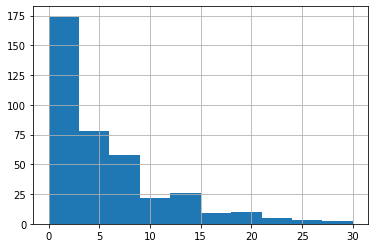

In [926]:
students.absences.hist()

Визуально ситуация стала намного лучше

### score

	 score 

50.0     54
55.0     44
0.0      37
75.0     33
65.0     31
60.0     31
40.0     28
70.0     27
45.0     25
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      5
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64 

count    381.000000
mean      52.296588
std       23.065438
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64 

Количество нулевых значений = 6
None 

None


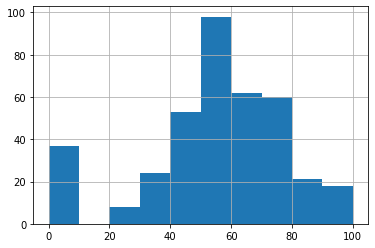

In [927]:
print(general_info('score'))
students.score.hist()

Итак, мы видим что значения лежат в пределах от 0 до 100, из чего следует предположение, что оценка производится по 100-балльной шкале.
Однако у нас присутствуют значения 0, что может быть связано с тем, что ученик в принципе не присутствовал на экзамене или сдал пустой лист.

По графику мы видим, что большинство оценок начинаются со значение 20. Давайте посмотрим, сколько у нас учеников, которые имеют оценку от 0 до 20:

In [928]:
students[students.score < 20].score.count()

37

In [929]:
# Сразу избавимся от нулевых значений
students = students.drop(students[students.score == 0].index)

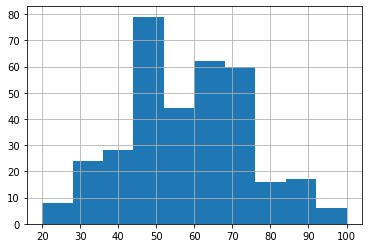

In [930]:
students.score.hist()

# Резюме
Проанализировов все колонки, можем их распределить на три типа для дальнейшего корреляционного анализа.
1. Числовые (3 столбца): age, absences, score
2. Категориальные - бинарные (13 столбцов): school, sex, address, famsize, Pstatus, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic
3. Категориальные - оценочные (13 столбцов): Medu, Fedu, Mjob, Fjob, reason, guardian, traveltime, studytime, failures, famrel, freetime, go_out, health

In [931]:
# Посмотрим, в каких столбцах остались нулевые значения:
students.isnull().sum(axis = 0) 

school         0
sex            0
age            0
address        0
famsize       24
Pstatus       39
Medu           0
Fedu           0
Mjob          17
Fjob           0
reason        15
guardian      28
traveltime     0
studytime      0
failures       0
schoolsup      0
famsup        35
paid          37
activities    12
nursery        0
higher         0
internet       0
romantic      29
famrel        23
freetime       9
goout          7
health        13
absences       0
score          6
dtype: int64

In [932]:
# Посмотрим на общие характеристики обновлённого и обработанного датасета
students.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      350 non-null    object 
 1   sex         350 non-null    object 
 2   age         350 non-null    int64  
 3   address     350 non-null    object 
 4   famsize     326 non-null    object 
 5   Pstatus     311 non-null    object 
 6   Medu        350 non-null    float64
 7   Fedu        350 non-null    float64
 8   Mjob        333 non-null    object 
 9   Fjob        350 non-null    object 
 10  reason      335 non-null    object 
 11  guardian    322 non-null    object 
 12  traveltime  350 non-null    float64
 13  studytime   350 non-null    float64
 14  failures    350 non-null    float64
 15  schoolsup   350 non-null    object 
 16  famsup      315 non-null    object 
 17  paid        313 non-null    object 
 18  activities  338 non-null    object 
 19  nursery     350 non-null    o

# Корреляционный анализ

## Числовые столбцы

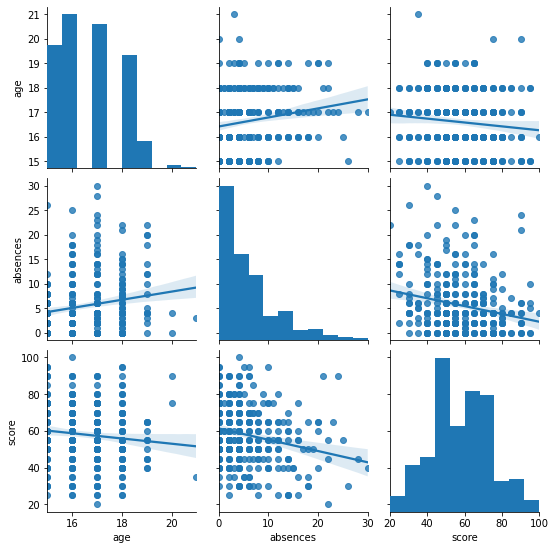

In [933]:
# Воспользуемся функцией pairplot из модуля seaborn.
sns.pairplot(students[['age', 'absences', 'score']], kind='reg')

In [934]:
# Используем для наглядности матрицу корреляций.
students[['age', 'absences', 'score']].corr()

,age,absences,score
age,1.000000,0.175367,-0.106039
absences,0.175367,1.000000,-0.221238
score,-0.106039,-0.221238,1.000000


### Вывод
Mежду возрастом и оценкой присутствует обратная корреляция: чем выше возраст, тем ниже оценка. 
Между пропусками и оценкой присутствует обратная корреляция: чем больше ученик пропускал занятий, тем ниже его балл. 
Прямая корреляция между пропусками и возрастом: чем взрослее ученик, тем больше он пропускает занятия.

## Номинативные столбцы

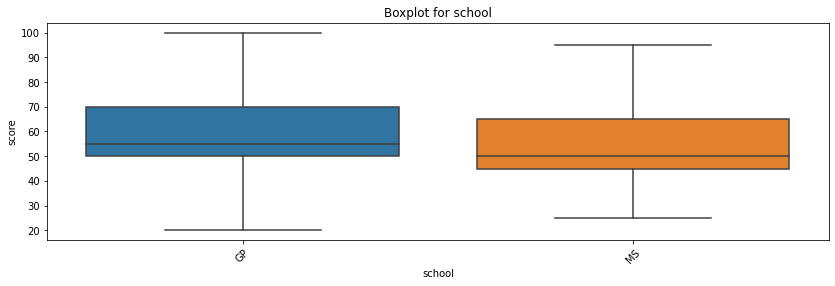

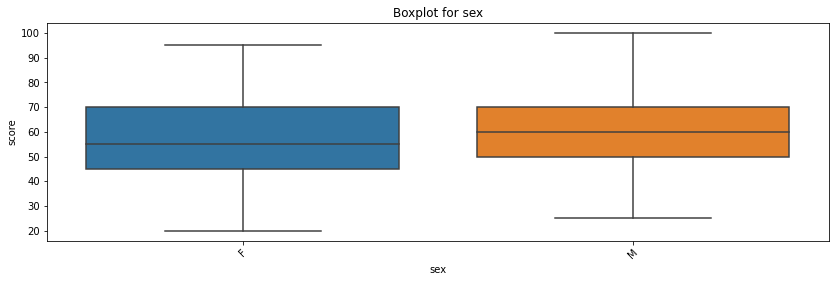

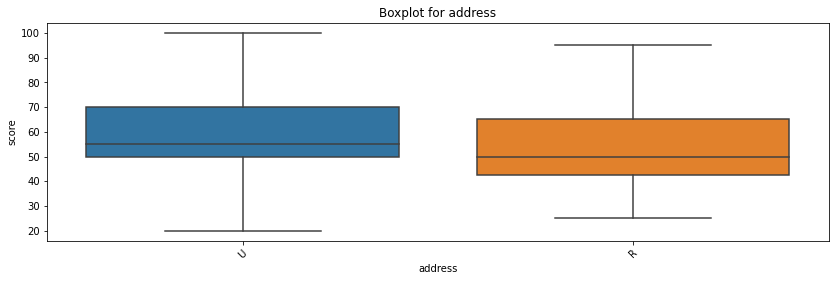

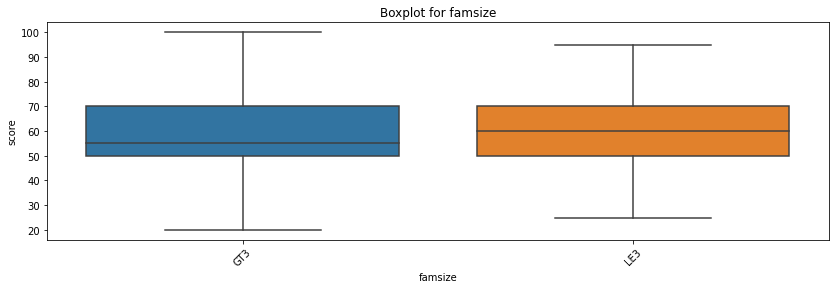

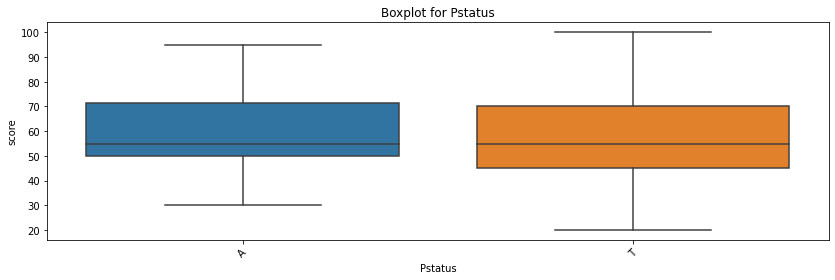

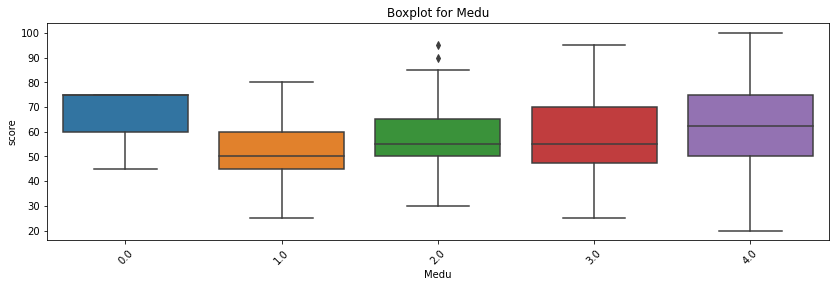

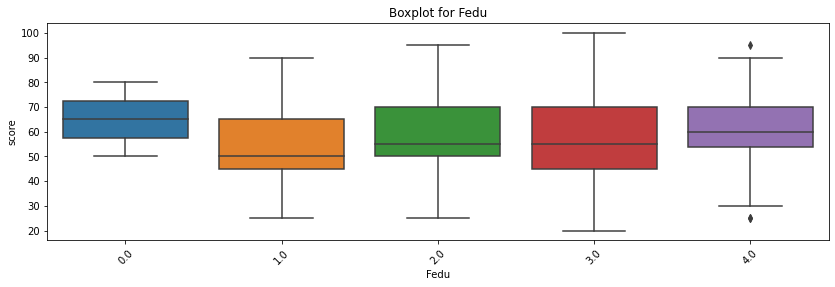

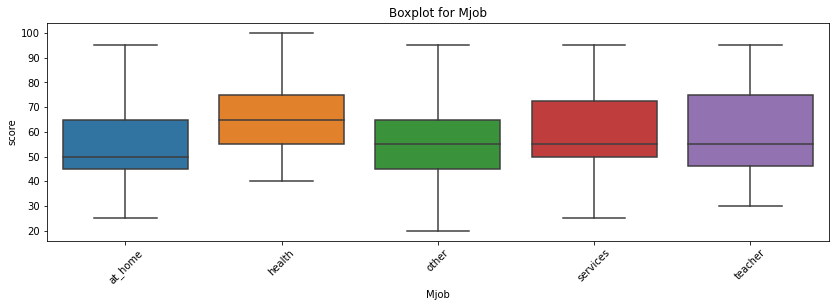

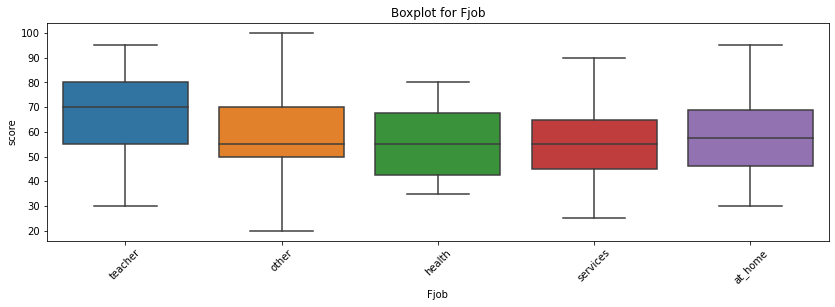

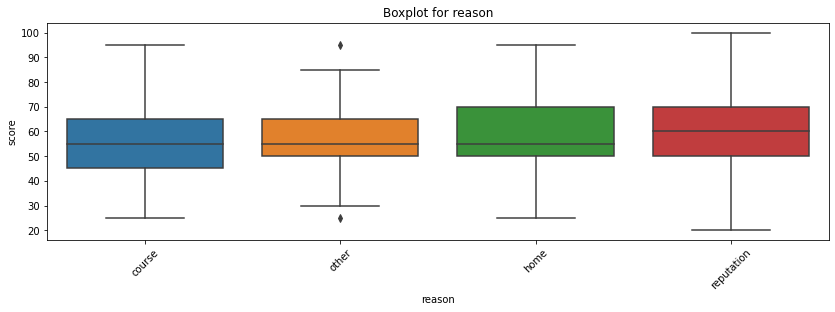

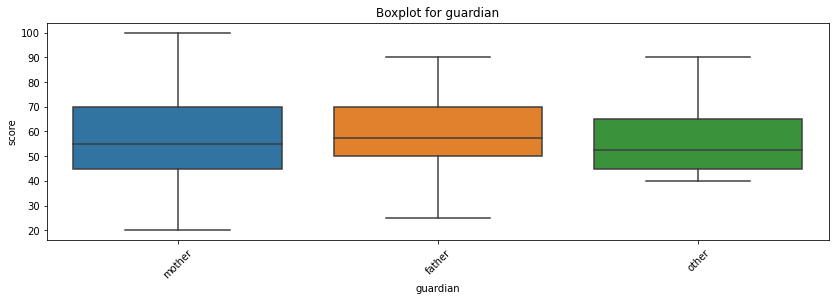

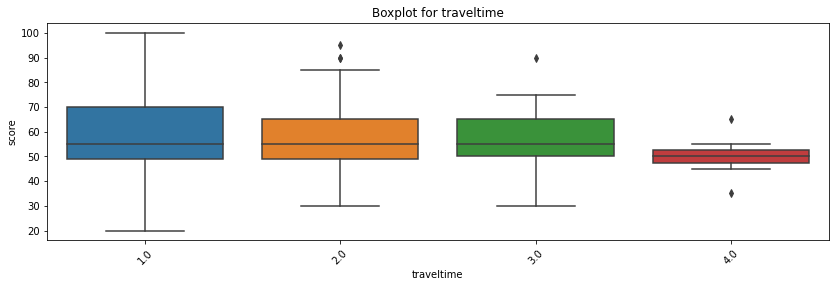

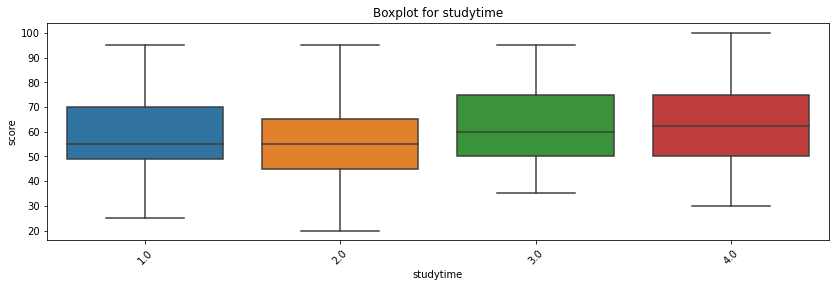

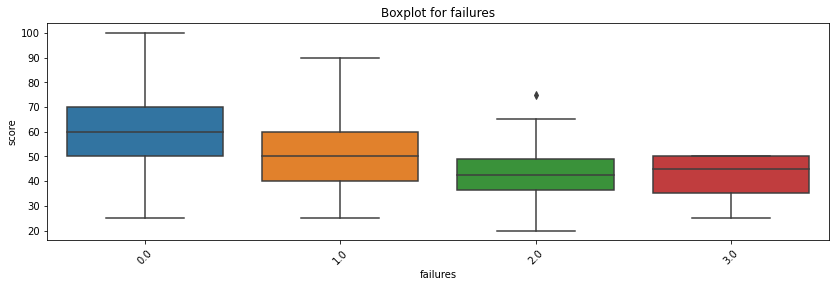

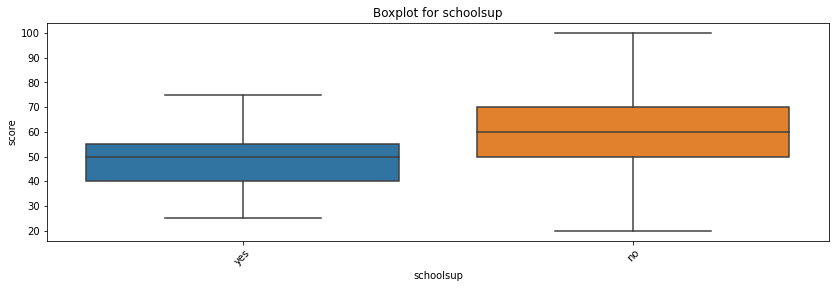

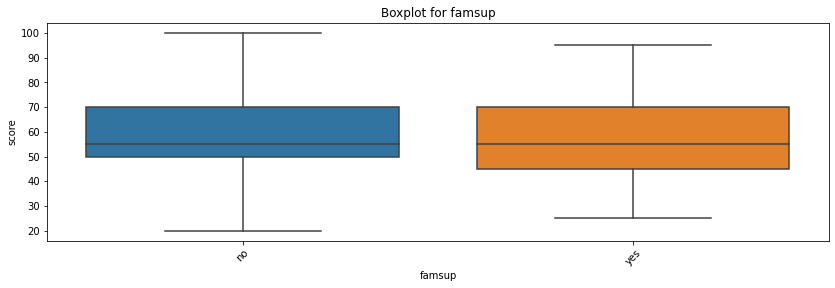

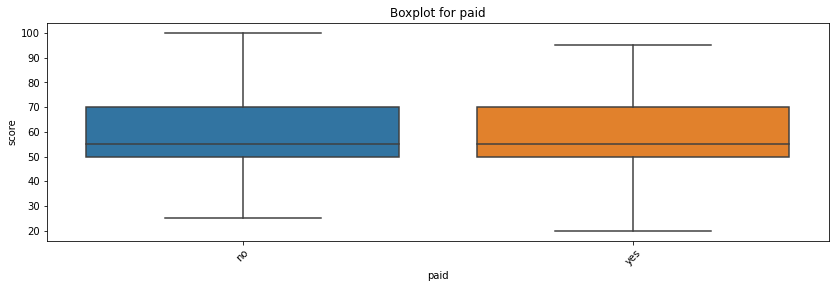

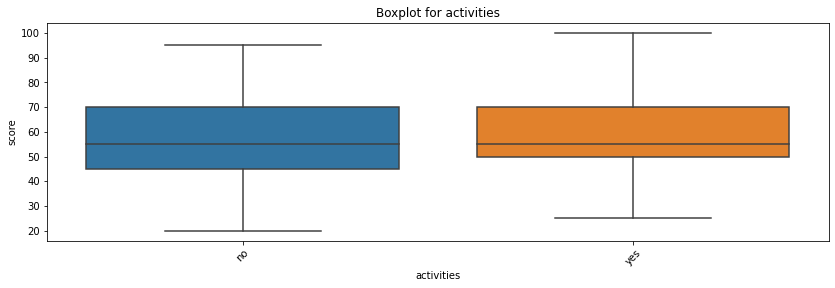

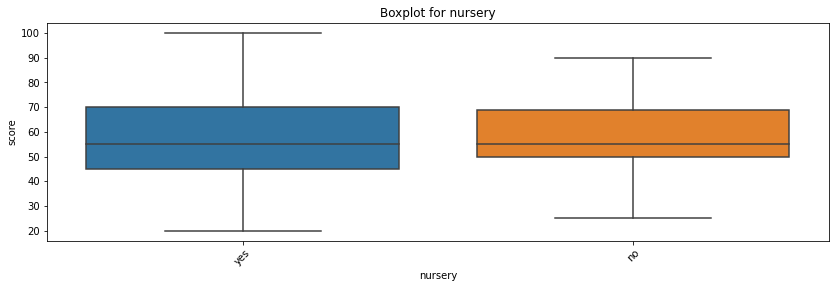

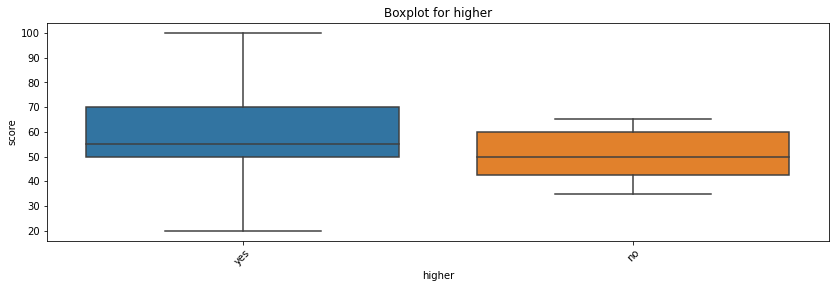

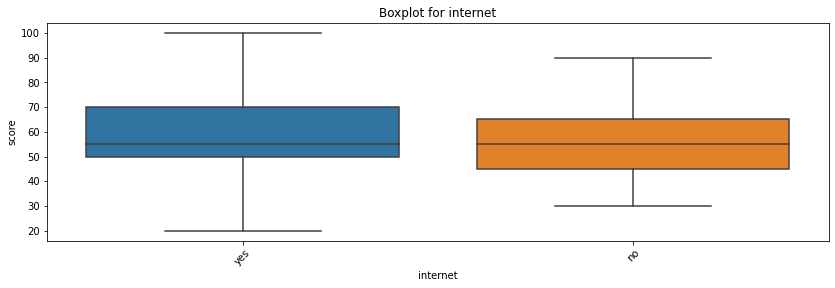

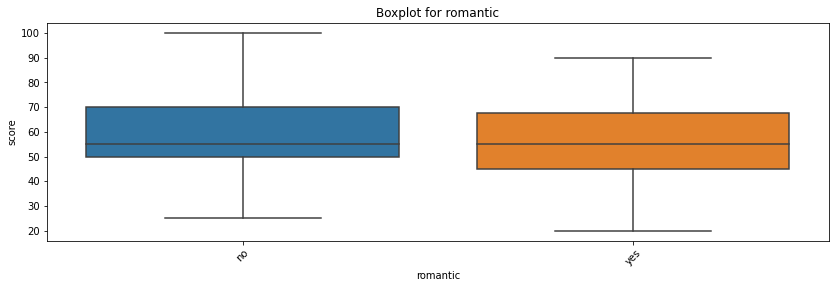

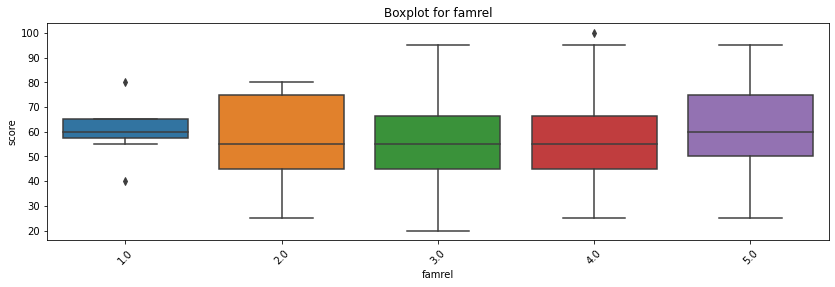

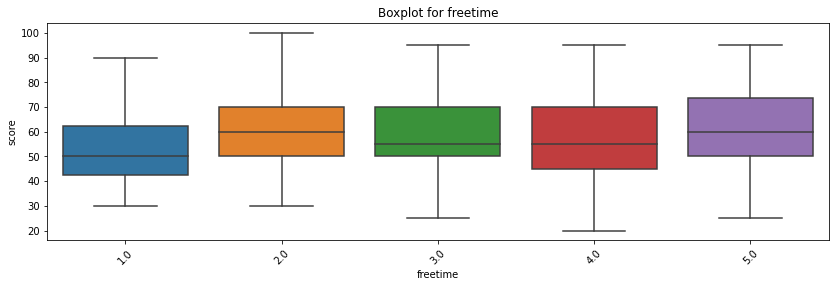

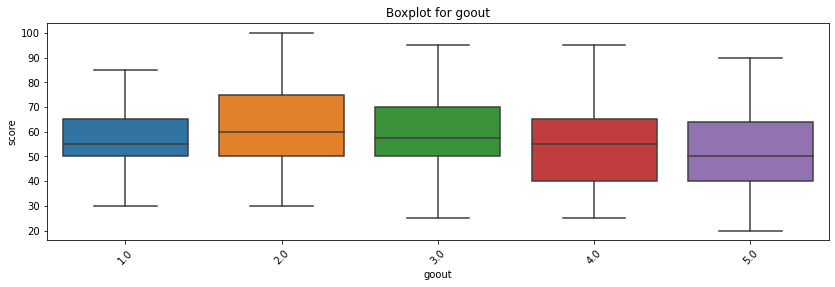

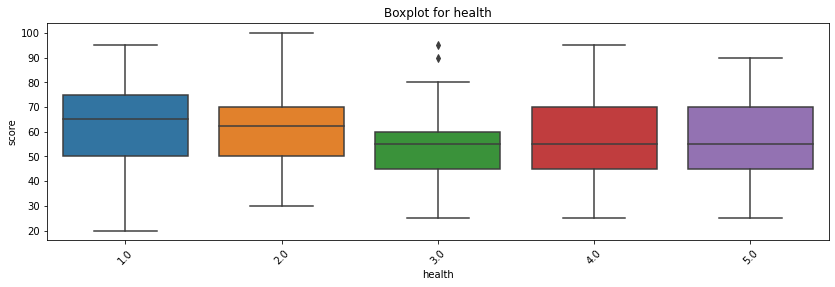

In [935]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
       'health']:
    get_boxplot(col)

### Вывод
По графикам можно заключить следующее: в школе GP у учеников немного больше шанс получить более высокую оценку, в среднем баллы мальчиков немного выше, сильное влияение на оценку оказвает удаленное проживание от школы (чем дальше проживание, тем хуже оценка). Практически не важен размер семьи и статус совместного жилья родителей. Интересная закономерность в связи с работой матери, работа в здравохранении и учителем оказывает положительное влияние на оценку. Сильно влияение можно наблюдать, если отец работает учителем, оценка резко становится более высокой. Можно сделать странный вывод, что для успешной оценки важно отсутствие школьной образовательной поддержки, и практически не важна образовательная поддержка дома, а также наличие платных курсов по математике, но в данном случае надо быть особенно аккуратными с выводами, т.к. по этим значениям больше всего пропусков данных (nan). Также не сильноважно посещал ли ребенок детский сад. Желание получить высшее образование и наличие интернета сильно влияет на оценку в положительную сторону. Хотя по колонке интернет много пропусков в данных, что может давать ложный вывод.

In [936]:
def get_stat_dif(column):
    cols = students.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(students.loc[students.loc[:, column] == comb[0], 'score'],
                        students.loc[students.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break
            
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
       'health']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки Mjob


К сожалению, тест Стьюдента выявил статистически значимые различия только одного параметра: Mjob. Но благодаря тщательному анализу данных, проведённому выше, я также могу добавить в модель следующие перемнные, которые очевидно оказывают влияние на успеваемость учеников: sex, address, Medu, Medu, studytime, failures, schoolsup, goout.
В общей сложности, включая корреляционный анализ числовых столбцов, я посчитала 11 переменных достаточно важными для включения их в итоговый датасет, на основе которого и будет проводиться обучение модели. 

In [937]:
data_for_model = students.loc[:, ['age', 'absences', 'sex', 'address',
                              'Medu', 'Fedu', 'Mjob', 'studytime',
                              'failures', 'schoolsup', 'goout', 'score']]
data_for_model.head(10)

,age,absences,sex,address,Medu,Fedu,Mjob,studytime,failures,schoolsup,goout,score
0,18,6.0,F,U,4.0,4.0,at_home,2.0,0.0,yes,4.0,30.0
1,17,4.0,F,U,1.0,1.0,at_home,2.0,0.0,no,3.0,30.0
2,15,10.0,F,U,1.0,1.0,at_home,2.0,3.0,yes,2.0,50.0
3,15,2.0,F,U,4.0,2.0,health,3.0,0.0,no,2.0,75.0
4,16,4.0,F,U,3.0,3.0,other,2.0,0.0,no,2.0,50.0
5,16,10.0,M,U,4.0,3.0,services,2.0,0.0,no,2.0,75.0
6,16,0.0,M,U,2.0,2.0,other,2.0,0.0,no,4.0,55.0
7,17,6.0,F,U,4.0,4.0,other,2.0,0.0,yes,4.0,30.0
8,15,0.0,M,U,3.0,2.0,services,2.0,0.0,no,2.0,95.0
9,15,0.0,M,U,3.0,4.0,other,2.0,0.0,no,1.0,75.0


# Выводы
### В результате EDA для анализа влияния параметров ученика на оценку на экзамене по математике были получены следующие выводы:
1. В данных было немало пропусков. Только в 3 параметрах не было пропусков, в других колонках процент пропусков мог превышать значение 10%.
2. Переменная "studytime, granular" был удален, так как являлся копией столбца "studytime", умноженного на -3.
3. Выбросов было обнаружено немного, или эти выбросы можно было таковыми не считать (ошибка при написании).
4. Переменная score содержала много нулевых значений, что может означать, что ученик не явился на экзамен или был дисквалифирован по неизвестным причинам. Так как это частные случаи и точная причина нам неизвестна, нулевые значения были удалены.
5. Между возрастом и оценкой присутствует обратная корреляция, что может означать, что чем выше возраст, тем ниже оценка.
6. Между пропусками занятий и оценкой присутствует обратная корреляция, что может означать, что чем больше ученик пропускал занятий, тем ниже его балл.
7. Существует также прямая корреляция между возрастом ученика и количеством пропуска занятий. Это показывает, что чем старше ученик, тем больше занятий он пропускает, что в свою очередь также влияет на итоговую оценку.
8. Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это age, absences, sex, address, Medu, Fedu, Mjob, studytime, failures, schoolsup, goout.